<a href="https://colab.research.google.com/github/je-blueink/Basics-for-statistics/blob/main/python-and-r/exercises_py.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

3장 2.
- x1, x2, x3 을 리스트로 정의
- 3개의 리스트를 value로 갖는 딕셔너리 만들기 (key: name, height, weight)

In [ ]:
x1 = ["kim", "lee", "park"]
x2 = [170, 160, 180]
x3 = [60, 55, 75]
dic1 = {'name':x1, 'height':x2, 'weight':x3}
dic1

{'name': ['kim', 'lee', 'park'],
 'height': [170, 160, 180],
 'weight': [60, 55, 75]}

3장 3.
- 위 딕셔너리로 데이터프레임 만들기
- 데이터프레임에서 첫 번째 사람 kim의 키, 몸무게 두 값만 배열로 추출

In [ ]:
import pandas as pd
df2 = pd.DataFrame(data=dic1)
print(df2)

   name  height  weight
0   kim     170      60
1   lee     160      55
2  park     180      75


In [ ]:
import numpy as np
arr2 = np.array(df2.iloc[0,[1,2]])
print(arr2)

[170 60]


4장 7.
- 함수 mywage 작성
(주당 근무시간 40시간 이내: 시간당 임금 1만원 / 40시간 초과분에 대해 1.5배 지급)

In [ ]:
def mywage(time):
   if(time>40):
    print("총 임금:", (40+(time-40)*1.5)*10000, "원")
   elif(time>0 and time<=40):
    print("총 임금:", time*10000, "원")
   else:
     print("총 임금: 0 원")
time = int(input("임금 계산을 위해 주당 근무시간을 입력하세요 : "))
mywage(time)

임금 계산을 위해 주당 근무시간을 입력하세요 : 30
총 임금: 300000 원


In [ ]:
mywage(100)

총 임금: 1300000.0 원


4장 9.
다음 R 함수문과 같은 기능을 실행하는 클래스 만들고 실행

```
example <- function(name){
  a = paste("Hello", name, "!")
  b = paste("Good-bye", name, "!")
  result <- list(a=a, b=b)
  return(result)
}

name <- "David"
aaa <- example(name)
aaa$a
aaa$b
```

In [ ]:
class example :
  def __init__(self, name):
    self.name = name
  def hello(self):
    hello = 'hello'+ " " + self.name + '!'
    return hello
  def bye(self):
    bye = 'Good-bye' + " " + self.name + '!'
    return bye

In [ ]:
aaa = example('David')
aaa.hello()

'hello David!'

In [ ]:
aaa.bye()

'Good-bye David!'

8장 2.
1985년 USDA 여성 영양 관련 자료 (25~50세, 랜덤표본 737명)

(1) 결측치는 0으로 표시되어 있다.
- 결측치를 제거하는 명령
- 변수별 결측치 개수 확인

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
# 데이터 입력 및 확인
data3 = pd.read_csv("/content/drive/MyDrive/data/nutrient2.csv")
data3.head(5)

,id,calcium,iron,protein,vitaminA,vitaminC
0,1,522.29,10.188,42.561,349.13,54.141
1,2,343.32,4.113,67.793,266.99,24.839
2,3,858.26,13.741,59.933,667.90,155.455
3,4,575.98,13.245,42.215,0.00,224.688
4,5,1927.50,18.919,111.316,740.27,80.961


In [ ]:
# 변수별 결측치 확인
data3 = data3.set_index("id")
data3 = data3.replace(0, np.nan)
data3.isnull().sum()

calcium     4
iron        2
protein     1
vitaminA    9
vitaminC    7
dtype: int64

In [ ]:
# 결측치 제거 및 확인
data_drop = data3.dropna(axis=0)
data_drop.isnull().sum()

calcium     0
iron        0
protein     0
vitaminA    0
vitaminC    0
dtype: int64

(2) 변수별 평균, 표준편차, 최솟값, 최댓값, 중앙값, 제1사분위수, 제3사분위수

In [ ]:
data3.describe()

,calcium,iron,protein,vitaminA,vitaminC
count,733.000000,735.000000,736.000000,728.000000,730.000000
mean,620.757749,11.133835,65.892848,835.949478,78.810208
std,394.939556,5.970502,30.499992,1637.222928,72.422305
min,7.440000,0.367000,2.255000,2.270000,0.037000
25%,325.950000,7.468000,45.522750,276.607500,25.624250
50%,547.430000,10.033000,61.239500,523.185000,53.681000
75%,822.570000,13.689000,80.805750,938.905000,108.626500
max,2866.440000,58.668000,251.012000,34434.270000,414.802000


(3) 변수별 상자그림 및 히스토그램 그리기 + 각 변수의 분포 설명

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

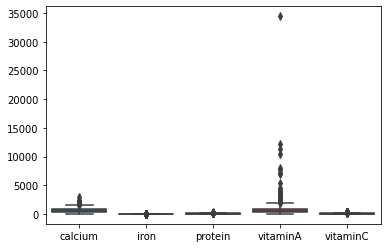

In [ ]:
sns.boxplot(data = data3)

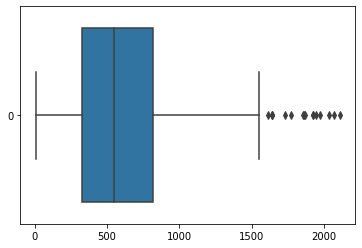

In [ ]:
# 분포를 좀 더 확인하기 쉽도록 각 변수별 이상치를 제거하고 각각 상자그림을 그림

# 이상치 제거

data_cal = pd.Series(data3.calcium, name="calcium")
lev_1q = data_cal.quantile(0.25)
lev_3q = data_cal.quantile(0.75)
iqr = lev_3q - lev_1q
rm_cal = data_cal[(data_cal <= lev_3q + (3 * iqr)) & (data_cal >= lev_1q - (3 * iqr))]
rm_cal = rm_cal.reset_index(drop=True)



Text(0.5, 1.0, 'Vitamin C')

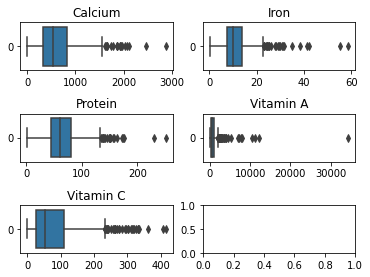

In [ ]:
# 분포를 좀 더 확인하기 쉽도록 각각 상자그림을 그림
fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6)) = plt.subplots(3,2)
plt.subplots_adjust(left=0.125, bottom=0.1,  right=0.9, top=0.9, wspace=0.2, hspace=0.9)

sns.boxplot(data = data3.calcium,orient="h", ax = ax1)
ax1.set_title("Calcium", fontsize = 12)

sns.boxplot(data = data3.iron,orient="h",ax = ax2)
ax2.set_title("Iron", fontsize = 12)

sns.boxplot(data = data3.protein, orient="h", ax = ax3)
ax3.set_title("Protein", fontsize = 12)

sns.boxplot(data = data3.vitaminA, orient="h", ax = ax4)
ax4.set_title("Vitamin A", fontsize = 12)

sns.boxplot(data = data3.vitaminC, orient="h", ax = ax5)
ax5.set_title("Vitamin C", fontsize = 12)

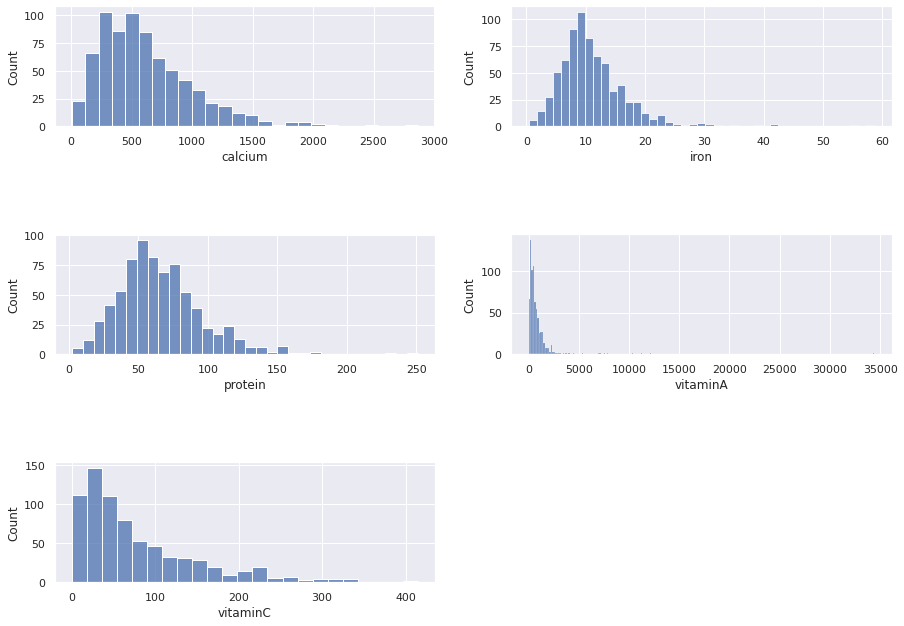

In [ ]:
# 변수별 히스토그램 그리기
fig = plt.figure(figsize=(15,10))
plt.subplots_adjust(left=0.125, bottom=0.1,  right=0.9, top=0.9, wspace=0.2, hspace=0.9)

sns.set(style="darkgrid")

b1 = fig.add_subplot(3,2,1)
b2 = fig.add_subplot(3,2,2)
b3 = fig.add_subplot(3,2,3)
b4 = fig.add_subplot(3,2,4)
b5 = fig.add_subplot(3,2,5)

sns.histplot(data3.calcium, label='calcium', ax=b1)
sns.histplot(data3.iron, label='iron', ax=b2)
sns.histplot(data3.protein, label='protein', ax=b3)
sns.histplot(data3.vitaminA, label='vitamin A', ax=b4)
sns.histplot(data3.vitaminC, label='vitamin C', ax=b5)